# Проект: Изучение закономерностей, определяющих успешность игр.

# Описание проекта:

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, необходимо выявить закономерности, определяющие успешность игры.

# План работ:

## 1. Загрузка и обзор данных.

**1.1 Загрузка библиотек.**

**1.2 Загрузка данных.**

## 2. Предобработка данных.

**2.1 Названия колонок.**

**2.2 Преобразование типов данных.**

**2.3 Работа с пропусками.**

**2.4 Создание новых колонок.**

## 3. Исследовательский анализ данных.

**3.1 Количество игр по годам.**

**3.2 Динамика продаж по платформам.**

**3.3 Определение актуального периода для построения прогноза на следующий год.**

**3.4 Определение потенциально прибыльных платформ.**

**3.5 Глобальные продажи игр в разбивке по платформам.**

**3.6 Влияние отзывов пользователей и критиков на продажи на самой популярной платформе. Корреляция.**

**3.7 Другие платформы.**

**3.8 Распределение игр по жанрам. Прибыльные жанры.**

## 4. Портрет пользователя каждого региона.

Для пользователя каждого региона (NA, EU, JP):

**4.1 Самые популярные платформы (топ-5).**

**4.2 Самые популярные жанры (топ-5).**

**4.3 Влияние рейтинга ESRB на продажи в отдельном регионе.**

## 5. Проверка гипотез.

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

**5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

## 6. Выводы.


## 1. Загрузка и обзор данных.

### 1.1. Загрузка библиотек.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy import stats as st
import seaborn as sns

### 1.2. Загрузка данных.

In [2]:
data = pd.read_csv('C:/Users/79998/Documents/daqw/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Имеем 16 713 строк и 10 колонок. Видим пропуски в некоторых столбцах. Проверим, есть ли явные дубликаты.

In [5]:
data.duplicated().sum()

0

Итак, выше мы провели первичный обзор датасета. Дубликатов не обнаружено. Однако есть довольно много пропусков, займемся ими на следующем шаге.

## 2. Предобработка данных.

### 2.1 Названия колонок.

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Успешно привели к нижнему регистру названия столбцов

### 2.2 Преобразование типов данных.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Так как в столбце с годом релиза есть пропуски - переведем данные в тип Int64, который поддерживает пропуски.

In [10]:
data['year_of_release'] = data['year_of_release'].astype("Int64")

Аналогично поступим с оценками критиков. Но сначала убедимся, что во всех значениях только ноль после запятой.

In [11]:
data['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: critic_score, Length: 82, dtype: int64

меняем колонку critic_score на Int64.

In [12]:
data['critic_score'] = data['critic_score'].astype("Int64")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


In [14]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


Преобразовал типы данных в следующих столбцах:
* year_of_release в целочисленные, так как год всегда целое число
* critic_score в целочисленные, так как этот рейтинг от 0 до 100.
Также, для дальнейшей работы я бы хотел привести рейтинг критиков и рейтинг пользователь к единому формату от 0 до 100. Для этого нужно умножить user_score на 10 и привести к целочисленному типу. Но сейчас я это сделать не могу, так как в этом столбце у меня помимо пропусков есть строчное значение - 'tbd'. Поэтому сделаем это позже, после проведения работы с пропусками.

### 2.3 Работа с пропусками.

In [15]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Видим, что пропуски есть в 6 столбцах. Разберемся сначала с пропусками в столбцах с названием игры и жанром

In [16]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Нашли эти 2 строки, в которых есть пропуски как в названии игры, так и в жанре. Кроме того, в них нет данных о рейтинге и оценках. К тому же это старые игры 1993 года, реализованные на старой платформе. Исходя из целей нашего исследования можно удалить эти строки.

In [17]:
data = data.dropna(subset=['name'])

Теперь разберемся с пропусками в годе релиза

In [18]:
data.query('year_of_release.isna()').groupby('platform').agg({'name': 'count'}).sort_values(by = 'name', ascending = False)

,name
platform,
PS2,34
Wii,34
DS,30
X360,30
PS3,25
XB,21
2600,17
PC,17
PSP,16


У нас всего 269 строк с пропусками в столбце с годом релиза. Это не так много учитывая размер датасета. В теории можно было бы удалить эти строки. Но для целей нашего исследования это делать не следует, так как мы потерям ценные данные по рейтингам и стоимости продаж в зависимости от жанра и платформы. В дальнейшем нам нужно построить график для 2017 года и работать с актуальными данными. Оставим эти строки.

Теперь разберемся с пропусками в оценках критиков и пользователей

In [19]:
len(data.query('critic_score.isna() and user_score.isna() and rating.isna()'))

6619

Выходит, что пропуски в рейтинге и оценках критиков и юзеров в одних и тех же строках. Думаю, самым корректным способом будет заполнить пропуски в оценках каким-то отрицательным значением, чтобы отличать эти пропуски от оценок равных 0. Но сперва проверим годы выпусков таких игр и соответствующие платформы.

In [20]:
data.query('critic_score.isna() and user_score.isna() and rating.isna()').groupby('year_of_release')\
.agg({'name': 'count'}).sort_values(by = 'name', ascending = False)

,name
year_of_release,
2010,447
2008,435
2011,410
2009,402
2007,374
1998,346
2006,326
1999,296
2012,287


In [21]:
data.query('critic_score.isna() and user_score.isna() and rating.isna()').groupby('platform')\
.agg({'name': 'count'}).sort_values(by = 'name', ascending = False)

,name
platform,
PS,983
DS,860
PS2,678
PSP,663
PS3,363
N64,319
Wii,313
GBA,300
3DS,288


Проверим еще насколько это популярные игры. Сколько из них проданы хотя бы в количестве 100 000 экземпляров.

In [22]:
len(data.query('critic_score.isna() and user_score.isna() and rating.isna()\
and (na_sales > 0.1 or eu_sales > 0.1 or jp_sales > 0.1 or other_sales > 0.1)'))

3137

Почти половина. Значит, это не совсем неизвестные инди-игры. Каких-либо закономерностей в разбивках по платформам и году релиза не обнаружено. Заполним пропуски, как мы ранее планировали.

In [23]:
data['critic_score'] = data['critic_score'].fillna(-7)
data['user_score'] = data['user_score'].fillna(-7)

Теперь изучим столбец с рейтингами. У нас есть исчерпывающий перечень таких рейтингов. Попробуем проверить, можем ли мы для каких-то срок заполнить пропуски. Предположим, что есть такие рейтинги, которые присущи определенному жанру. Возьмем например жанр "Пазлы".

In [24]:
data[data['genre'] == 'Puzzle'].groupby('rating')['genre'].count()

rating
E       289
E10+     43
T        10
Name: genre, dtype: int64

Итак, видим, что хоть большинство пазл-игр наделены рейтингом Е (для всех возрастов), есть и другие категории (10 + и 13 + лет)
Казалось бы, такой очевидный жанр, но даже внутри него есть разные рейтинги. Поэтому оставим пропуски в этих строках.

In [25]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

**Итог работы с пропусками:**
* name - удалили 2 строки. В них полно пропусков. Это старые игры. Удаление не навредит нашему исследованию


* year_of_release - оставили пропуски. У нас всего 269 строк с пропусками в столбце с годом релиза. Это не так много учитывая размер датасета. В теории можно было бы удалить эти строки. Но для целей нашего исследования это делать не следует, так как мы потерям ценные данные по рейтингам и стоимости продаж в зависимости от жанра и платформы. Второй вариант, заполнить медианой в зависимости от платформы. Но, думаю, это лишено смысла для наших целей. В дальнейшем нам нужно построить график для 2017 года и работать с актуальными данными. Оставим эти строки.


* critic_score и user_score - заполнили пропуски в оценках отрицательным значением, чтобы отличать эти пропуски от оценок равных 0. Эти строки понадобятся нам в исследовательской части в том числе при анализе зависимостей по жанрам и платформам. Можно было бы заполнить медианой в зависимости от платформы, жанра и года релиза. Но это очень субъективный подход.


* rating - оставили пропуски. Даже среди самых очевидных жанров категории различаются.

**Причины появления пропусков:**

* name: думаю это техническая ошибка


* year_of_release: допускаю, что может быть как техническая ошибка, так и неоднозначность данных о годе релиза. Например игры можут выпускаться на разных платформах в разное время. Но думаю, скорее техническая ошибка. Условный Football Manager 2007 выходил осенью 2006, как и все другие части серии (осенью предыдущего года, отличного от цифры, указанной в названии на 1).


* critic_score: Думаю, что тут техническая ошибка. В срезе данных с пропусками есть игры на разных платформах, в том числе выпущенные не так давно. 


* user_score: Думаю, что ситуация тут аналогичная. Половина из более 6 тысяч игр так или иначе продавались в количестве не менее 100 тысяч экземпляров, значит в эти игры играли, у них юыли пользователи.


* rating: Думаю, что здесь тоже техническая ошибка.

В столбце с оценкой пользователей наблюдается аббревиатура 'tbd'. Разберем этот момент отдельно и решим как поступить с такими строками.

In [26]:
data[data['user_score'] == 'tbd'].sort_values(by = 'na_sales', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-7,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.0,0.00,-7,tbd,E
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E


У этой аббревиатуры есть несколько трактовок, на в нашем контексте это обозначает - "подлежит уточнению"
Имеем 2424 строки с таким значением в столбце с оценками пользователей. В моем понимании это такой же пропуск как и остальные, только здесь он сознательный. Тоесть такие данные действительно объективно отсутствуют. Заменим эти значения на -7 для дальнейшей работы в исследовательской части.

In [27]:
data['user_score'] = data['user_score'].replace('tbd', -7)

In [28]:
len(data[data['user_score'] == 'tbd'])

0

Обработали такие значения. Теперь можно привести этот столбец к типу int. Но сперва умножим значения на 10, чтобы перевести в 100-бальный диапазон значений. Это нужно для того, чтобы и оценки критиков и оценки пользователей были в одном диапазоне от 0 до 100. В рейтингах пользователей есть дробные числа, если их сразу переводить в int, то дробная часть потеряется

In [29]:
data['user_score'] = pd.to_numeric(data['user_score'])
data['user_score'] = data['user_score'] * 10
data['user_score']

0        80.0
1       -70.0
2        83.0
3        80.0
4       -70.0
         ... 
16710   -70.0
16711   -70.0
16712   -70.0
16713   -70.0
16714   -70.0
Name: user_score, Length: 16713, dtype: float64

In [30]:
data['user_score'] = data['user_score'].astype("int")

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  Int64  
 9   user_score       16713 non-null  int32  
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), int32(1), object(4)
memory usage: 1.5+ MB


Данные готовы к анализу. Но сперва создадим несколько новых колонок.

### 2.4 Создание новых колонок.

Для дальнейшего исследования нам понадобится колонка с суммарными продажами игры во всех регионах.

In [32]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [33]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-7,-70,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-7,-70,NaN,31.38


Справились с этой задачей. Посмотрим тогда на топ-10.

In [34]:
data.sort_values(by = 'sum_sales', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-7,-70,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-7,-70,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-7,-70,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,66,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,84,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-7,-70,NaN,28.31


Покемоны, Марио, Тетрис, супер-шутер Дак Хант - одни легенды.
Лидирует с отрывом встроенная игра в WII на релизе приставки.

## 3. Исследовательский анализ данных.

### 3.1 Количество игр по годам.

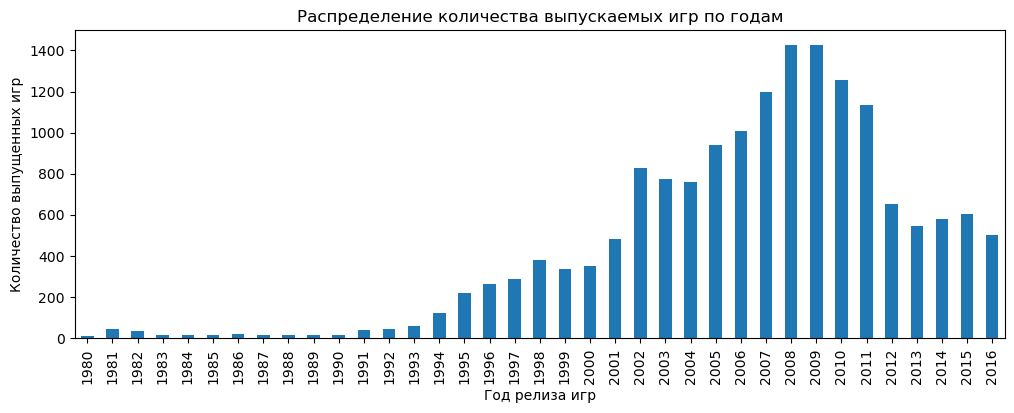

In [35]:
data.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize=(12, 4),\
title='Распределение количества выпускаемых игр по годам', xlabel='Год релиза игр',\
ylabel='Количество выпущенных игр')
plt.show()

с 1980 по 1990 год выпускалось совсем стабильно совсем немного игр. Начиная с 1991 года выпуск игр стал постепенно расти. Пик - 2008 и 2009 год. После 2011 года замечаем резкий спад. Думаю это связано с развитием технологий, развитием индустрии, появлением большего количества платформ с последующим их, так скажем, отмиранием.

Для планирования кампании на 2017-й год нельзя сказать, что важны все данные. Однако для понимания динамики количества выпускаемых игр в год - это полезные данные.

### 3.2 Динамика продаж по платформам.

Для начала посмотрим на распределение суммарного количества проданных копий по платформам.

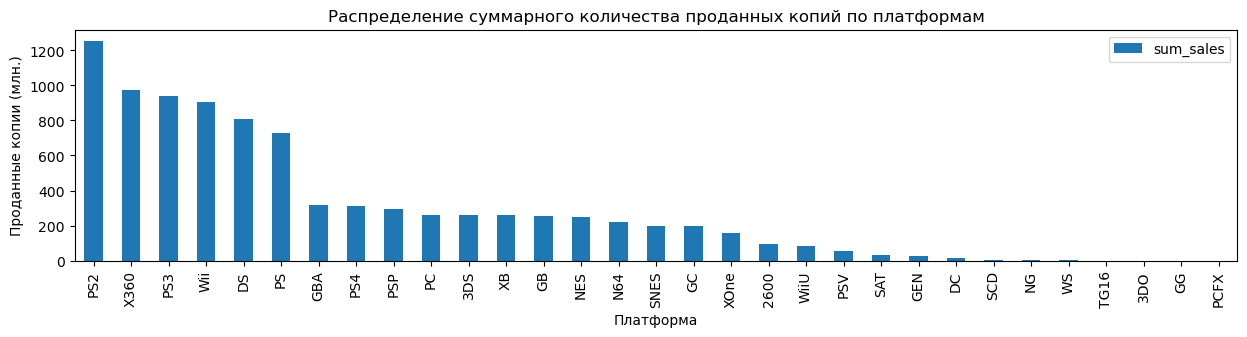

In [36]:
data.groupby(['platform']).agg({'sum_sales': 'sum'}).sort_values(by = 'sum_sales', ascending = False)\
.plot(kind = 'bar', figsize = (15,3))
plt.title("Распределение суммарного количества проданных копий по платформам")
plt.xlabel("Платформа")
plt.ylabel("Проданные копии (млн.)")
plt.show()

Выделяются топ-6 платформ. Для дальнейшего анализа возьмем 5 самых популярных платформ.

In [37]:
data.groupby(['platform']).agg({'sum_sales': 'sum'}).sort_values(by = 'sum_sales', ascending = False).head(5)

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


построим график продаж по годам.

In [38]:
sales_by_years = data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS")').pivot_table(index = ['year_of_release'],\
columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
sales_by_years.head()

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN


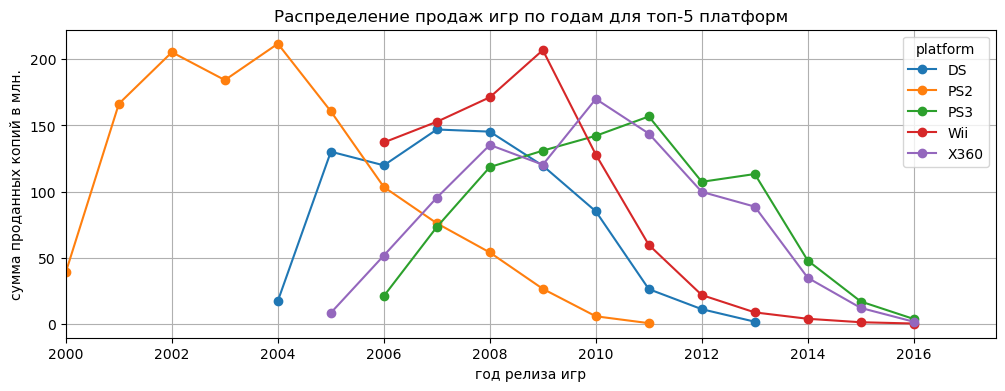

In [39]:
sales_by_years.plot(title='Распределение продаж игр по годам для топ-5 платформ', xlabel='год релиза игр',\
ylabel='сумма проданных копий в млн.', grid=True, figsize=(12, 4), xlim=2000, style='-o')
plt.show()

Видим, что характерный срок "жизни" платформы - 10-12 лет. (из рассмотренных). Исключение - PC

Пик продаж приходится на 3-5 год запуска платформы.

### 3.3 Определение актуального периода для построения прогноза на следующий год.

Следует взять период за последние 3 года. Он будет являться актуальным. Он поможет построить прогноз на 2017 год. Перезапишем датасет в новую переменную new_data. Далее будет работать только с ней

In [40]:
new_data = data[data['year_of_release'] > 2013]
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-7,-70,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-7,-70,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-7,-70,NaN,7.98


### 3.4 Определение потенциально прибыльных платформ.

Посмотрим на продажи за 3-летний период.

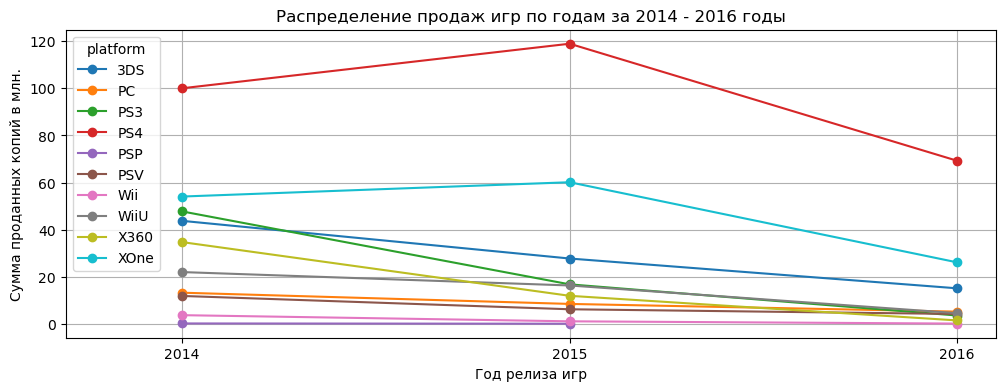

In [41]:
ax = new_data.pivot_table(index = ['year_of_release'],columns = 'platform', values = 'sum_sales', aggfunc = 'sum')\
.plot(title='Распределение продаж игр по годам за 2014 - 2016 годы', xlabel='Год релиза игр',\
ylabel='Сумма проданных копий в млн.', grid=True, figsize=(12, 4), xlim=(2013.7), style='-o')
ax.locator_params(integer=True)
plt.show()

In [42]:
new_data.pivot_table(index = ['year_of_release'],columns = 'platform', values = 'sum_sales', aggfunc = 'sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Лидируют по продажам платформы 
* PS4
* XOne
* 3DS

Все из отобранных и представленных на графике платформ падают по продажам копий игр, релиз которых был в соответствующем году.

В качестве потенциально прибыльных платформ выберем топ-3 лидирующие платформы, а также PC (за стабильность, устойчивость и универсальность платформы). Общий список такой:

* PS4
* XOne
* 3DS
* PC

### 3.5 Глобальные продажи игр в разбивке по платформам.

Посмотрим на распределение числа проданных копий игры в разбивке по платформам.

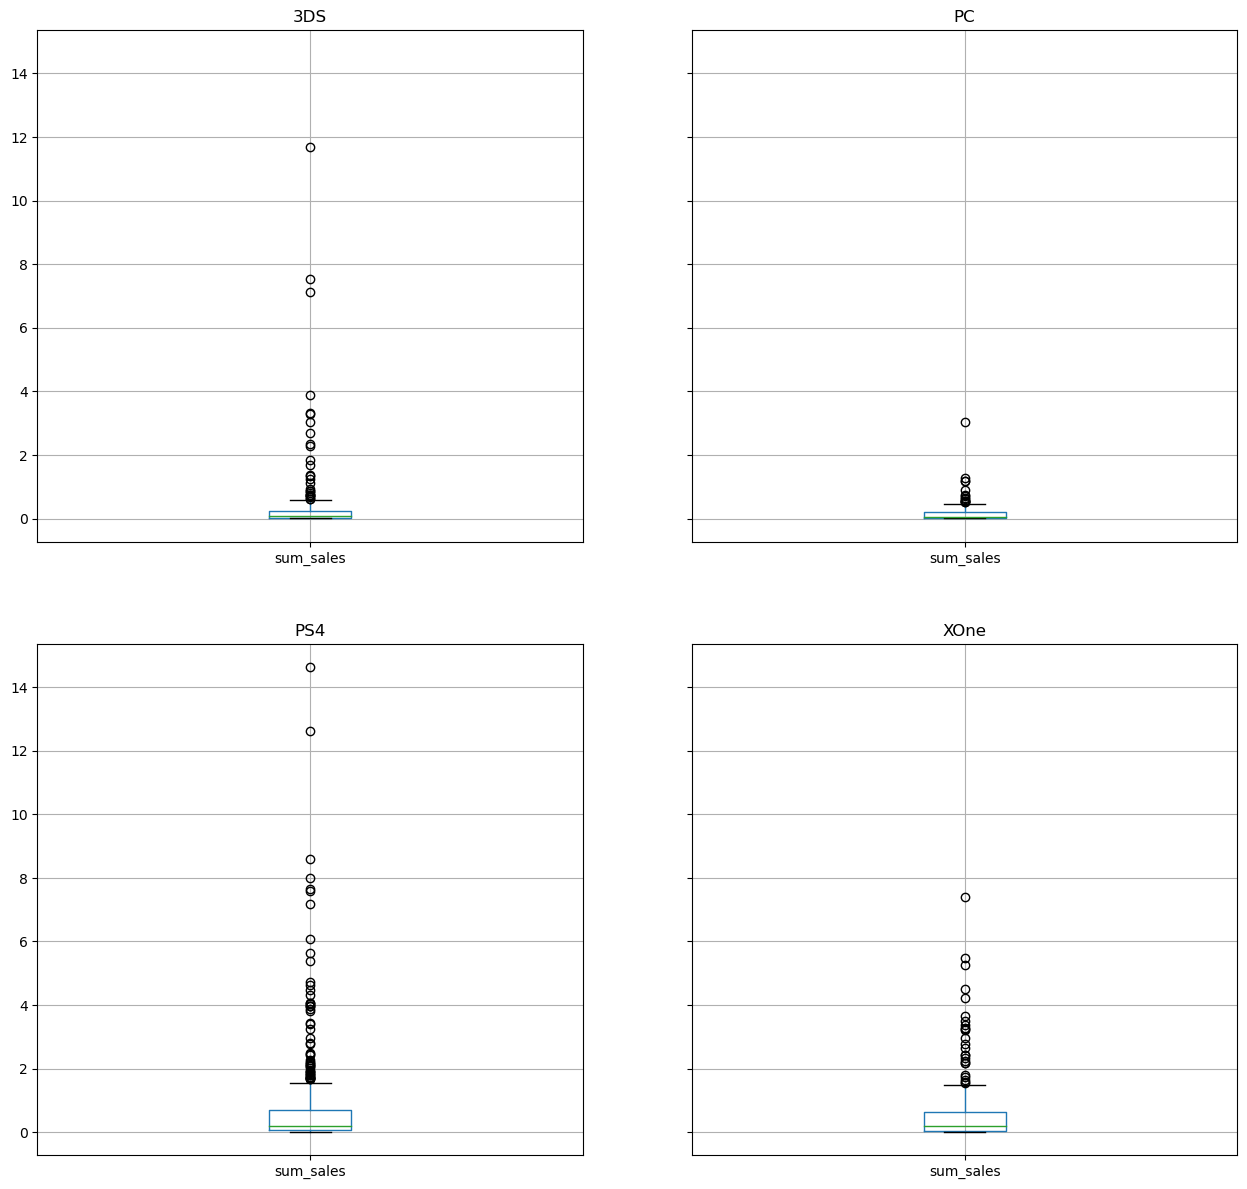

In [43]:
new_data.query('platform in ("PS4", "XOne", "3DS", "PC")')\
.groupby(by = 'platform').boxplot(column='sum_sales', figsize = (15,15))
plt.show()

Для удобства сравнения отобразим все диаграммы размаха на одном графике. Уменьшим ось Y, чтобы получше разглядеть сам ящик.

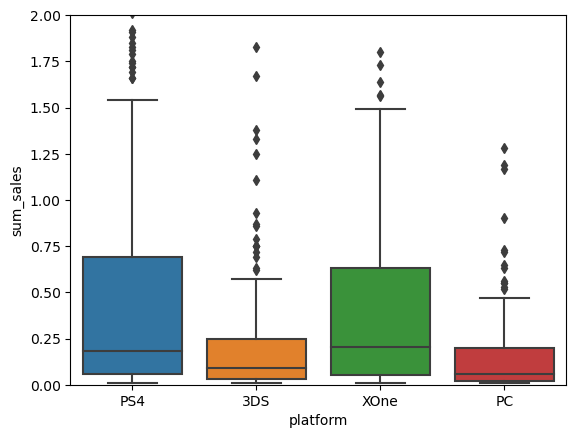

In [44]:
sns.boxplot(data = new_data.query('platform in ("PS4", "XOne", "3DS", "PC")'), y = 'sum_sales', x='platform')
plt.ylim(0,2)
plt.show()

В завершении вызовем метод describe.

In [45]:
new_data.query('platform in ("PS4", "XOne", "3DS", "PC")')\
.groupby(by = 'platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


Выбросы есть везде, однако на PC кажется, что их меньше, и они не такие далекие, большинство прижато к правому усу.
На XOne разброс заметно сильнее.
Самые большие выбросы есть на PS4 и 3DS. Там есть игры, проданные в количестве ~ 10 - 15 млн.

Посмотрим что это за игры. Сделаем срез по играм с более 5 млн. проданных копий.

In [46]:
new_data.query('platform in ("PS4", "XOne", "3DS", "PC") and sum_sales > 5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-7,-70,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-7,-70,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-7,-70,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,57,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,50,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,-7,-70,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-7,-70,NaN,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,65,M,7.17


Определенно выбросы имеются. Здесь много действительно топовых игр, в которые играют миллионы людей, например FIFA. Часть этих игр могли идти в комплекте с приставкой. Например, при покупки PS4 в 2017 в комплекте шли 3 диска, в том числе Uncharted 4: A Thief's End. Думаю такой подход увеличил количество проданных копий и без того популярным играм. Также подозреваю, что есть игры на других платформах, которые были встроены уже в эти платформы по примеру Wii Sports.

### 3.6. Влияние отзывов пользователей и критиков на продажи на самой популярной платформе. Корреляция.

Построим точечниый график зависимости числа проданных копий от оценки **критиков** для PS4.

И точечниый график зависимости числа проданных копий от оценки **юзеров** для PS4.

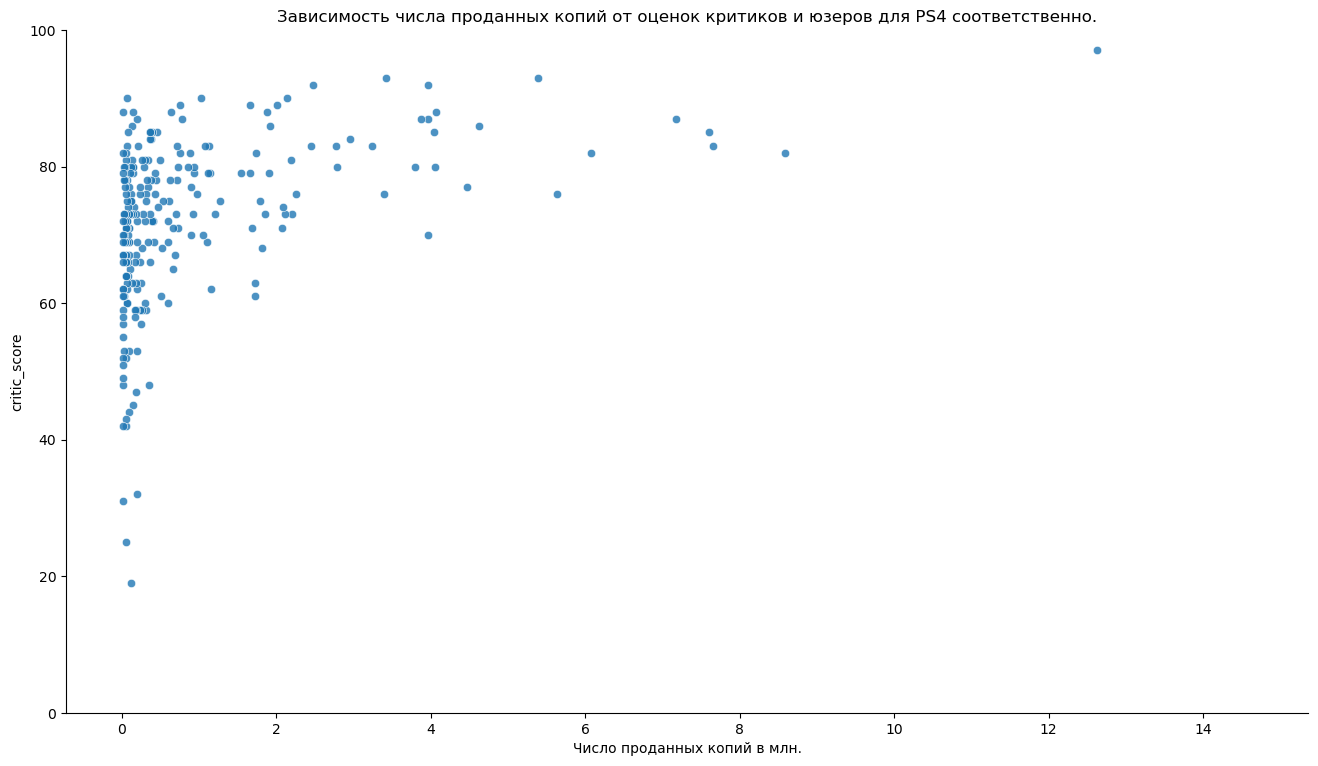

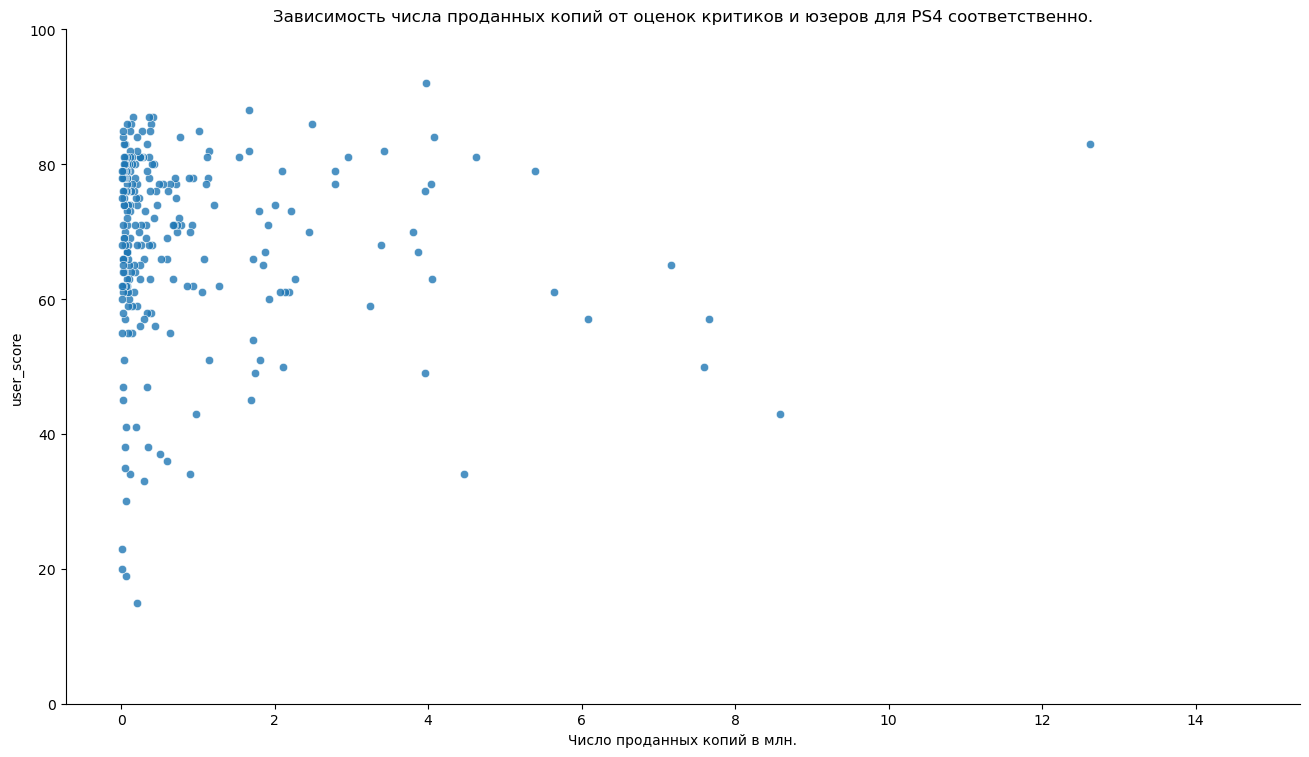

In [47]:
for row in ['critic_score', 'user_score']:
    sns.relplot(data=new_data.query('platform in ("PS4")'), x='sum_sales', y=row, kind='scatter', alpha=0.8)
    plt.ylim([0, 100])
    plt.xlabel("Число проданных копий в млн.")
    plt.title("Зависимость числа проданных копий от оценок критиков и юзеров для PS4 соответственно.")
    plt.gcf().set_size_inches(15,8)

Так как ранее мы заполняли пропуски в оценках критиков и пользователей отрицательными значениями, чтобы корректно посчитать корреляцию. Сделаем срез new_data и сохраним в новую переменную new_data_cor.

In [48]:
new_data_cor = new_data[(new_data['user_score'] >= 0) & (new_data['critic_score'] >= 0)].copy()
new_data_cor = new_data_cor.query('platform in ("PS4")')

In [49]:
new_data_cor['critic_score'] = new_data_cor['critic_score'].astype("int32")
print(f"Коэффициент корреляции пирсона для оценок критиков к глобальным продажам на PS4:\
{new_data_cor['critic_score'].corr(new_data_cor['sum_sales'])}")

Коэффициент корреляции пирсона для оценок критиков к глобальным продажам на PS4:0.4019028781147531


In [50]:
print(f"Коэффициент корреляции пирсона для оценок пользователей к глобальным продажам на PS4:\
{new_data_cor['user_score'].corr(new_data_cor['sum_sales'])}")

Коэффициент корреляции пирсона для оценок пользователей к глобальным продажам на PS4:-0.04318585997193628


Вывод:
* на количество глобальных продаж влияют оценки критиков. Чем выше оценка, тем, как правило, больше проданных копий конкретной игры. Эти данные коррелируют.
* на количество глобальных продаж не влияют оценки критиков. Данные не коррелируют в положительном смысле. Взаимосвязь слабая, не линейная.

### 3.7 Другие платформы.

Построим аналогичные графики применительно к остальным платформам.

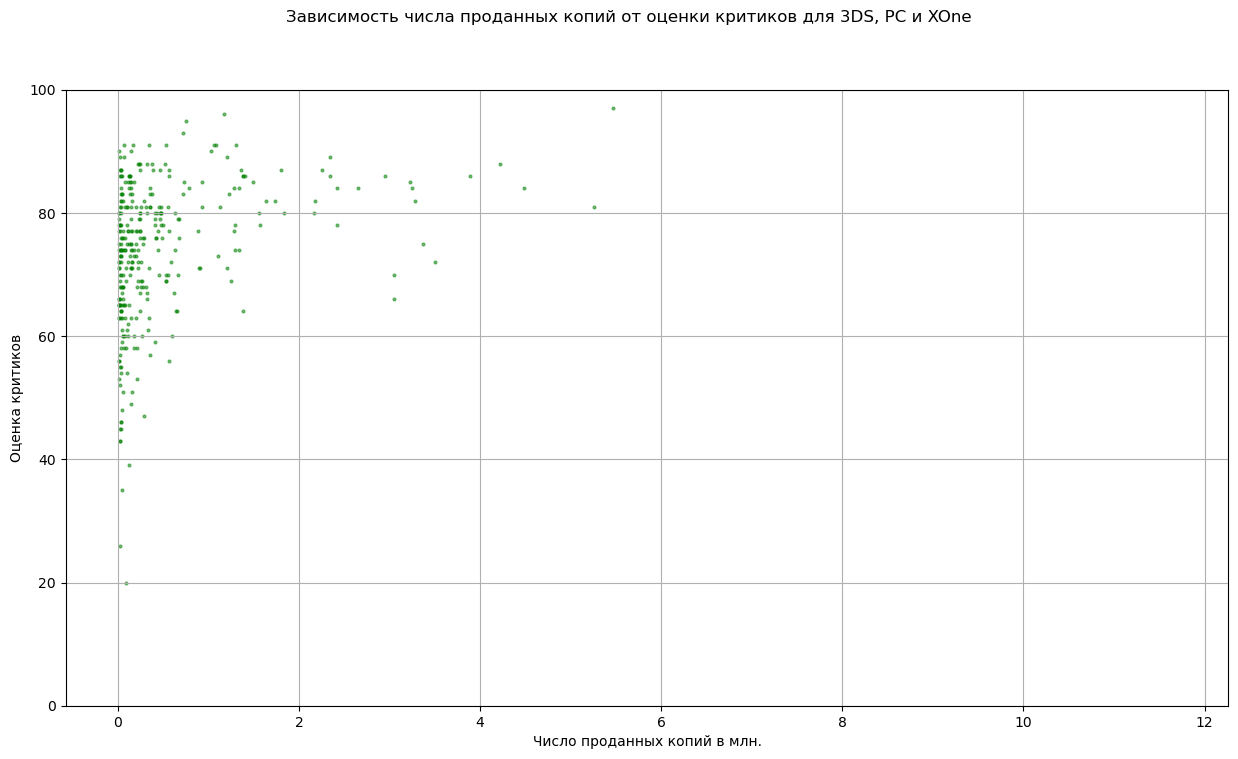

In [51]:
new_data.query('platform in ("3DS", "PC", "XOne")').plot(
    kind='scatter', title='Зависимость числа проданных копий от оценки критиков для 3DS, PC и XOne',\
xlabel='Число проданных копий в млн.', ylabel='Оценка критиков',  y='critic_score' , x='sum_sales',\
alpha=0.5, subplots=True, grid=True,\
figsize=(15,8), c = 'g', s = 4
)
plt.ylim([0, 100])
plt.show()

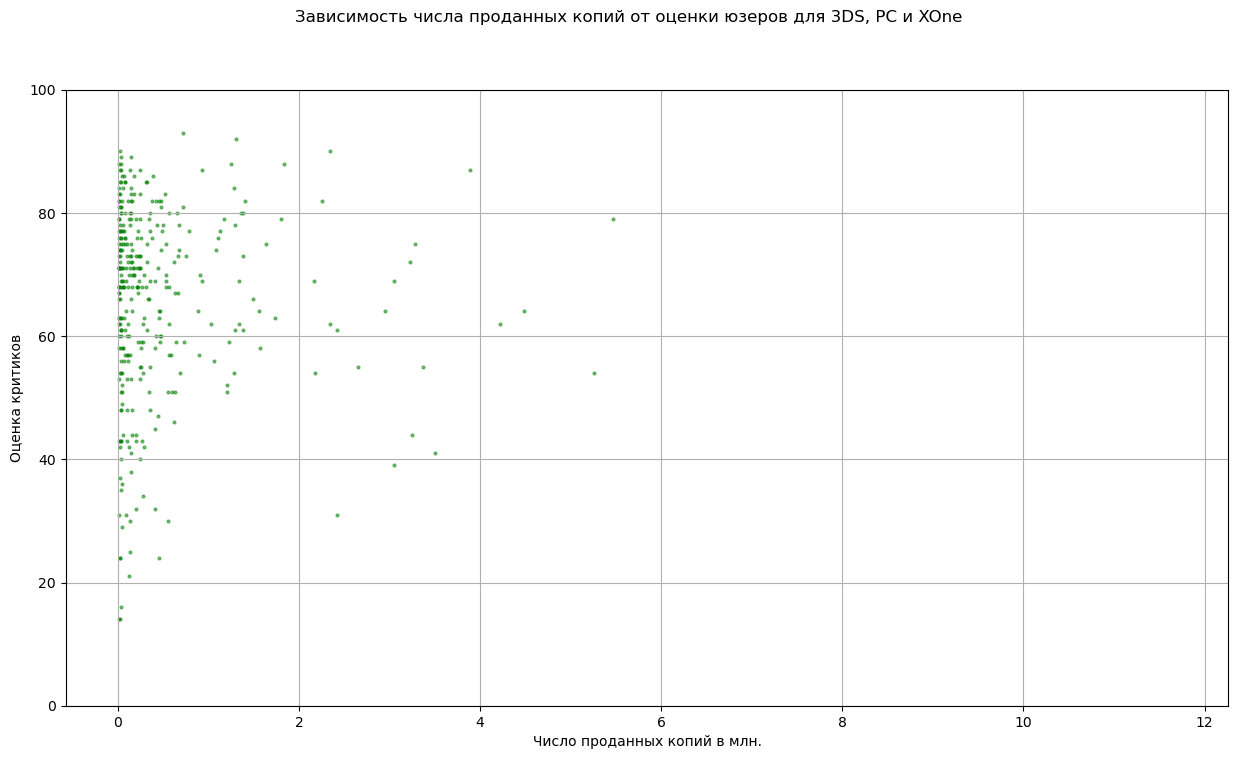

In [52]:
new_data.query('platform in ("3DS", "PC", "XOne")').plot(
    kind='scatter', title='Зависимость числа проданных копий от оценки юзеров для 3DS, PC и XOne',\
xlabel='Число проданных копий в млн.', ylabel='Оценка критиков',  y='user_score' , x='sum_sales',\
alpha=0.5, subplots=True, grid=True,\
figsize=(15,8), c = 'g', s = 4
)
plt.ylim([0, 100])
plt.show()

Посчитаем коэффициент корреляции Пирсона для других платформ. Не забудем предварительно исключить строки, в которых мы заполняли пропуски отрицательным значением.

In [53]:
new_data_cor_rest = new_data[(new_data['user_score'] >= 0) & (new_data['critic_score'] >= 0)].copy()

In [54]:
new_data_cor_rest['critic_score'] = new_data_cor_rest['critic_score'].astype("int32")
print(f"Коэффициент корреляции Пирсона для оценок критиков к глобальным продажам на PS4:{new_data_cor['critic_score'].corr(new_data_cor['sum_sales'])}")
print(f"Коэффициент корреляции Пирсона для оценок критиков к глобальным продажам:{new_data_cor_rest['critic_score'].corr(new_data_cor_rest['sum_sales'])}")
print(' ')
print(f"Коэффициент корреляции Пирсона для оценок пользователей к глобальным продажам на PS4:{new_data_cor['user_score'].corr(new_data_cor['sum_sales'])}")
print(f"Коэффициент корреляции Пирсона для оценок пользователей к глобальным продажам:{new_data_cor_rest['user_score'].corr(new_data_cor_rest['sum_sales'])}")


Коэффициент корреляции Пирсона для оценок критиков к глобальным продажам на PS4:0.4019028781147531
Коэффициент корреляции Пирсона для оценок критиков к глобальным продажам:0.32536261200758826
 
Коэффициент корреляции Пирсона для оценок пользователей к глобальным продажам на PS4:-0.04318585997193628
Коэффициент корреляции Пирсона для оценок пользователей к глобальным продажам:0.00520225836008747


Вывод следующий:
* Продаваемость игры практически не зависит от оценок пользователей. Здесь нет корреляции и линейной зависимости.
* На продаваемость игры влияют оценки критиков. Корреляция достаточно ощутимая.
Это применимо как к одной популярной платформе, так и к остальным вместе взятым

### 3.8 Распределение игр по жанрам. Прибыльные жанры.

In [55]:
new_data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-7,-70,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-7,-70,NaN,11.68


Для этого нам нужно посчитать общее количество копий, среднее и медианное количество проданных игр в разбивке по жанрам.

In [56]:
genre_games = new_data.groupby('genre').agg({'sum_sales':['count', 'sum', 'median', 'mean']})\
.sort_values(by=[('sum_sales', 'count')],ascending = False)
genre_games

sum_sales                         
                 count     sum median      mean
genre                                          
Action             619  199.36  0.090  0.322068
Role-Playing       221  101.44  0.110  0.459005
Adventure          185   17.55  0.030  0.094865
Sports             161  109.48  0.180  0.680000
Shooter            128  170.94  0.515  1.335469
Misc               113   37.55  0.090  0.332301
Racing              69   27.52  0.090  0.398841
Fighting            60   28.22  0.125  0.470333
Simulation          44   13.13  0.100  0.298409
Platform            38   18.09  0.140  0.476053
Strategy            37    3.96  0.060  0.107027
Puzzle              14    2.21  0.045  0.157857

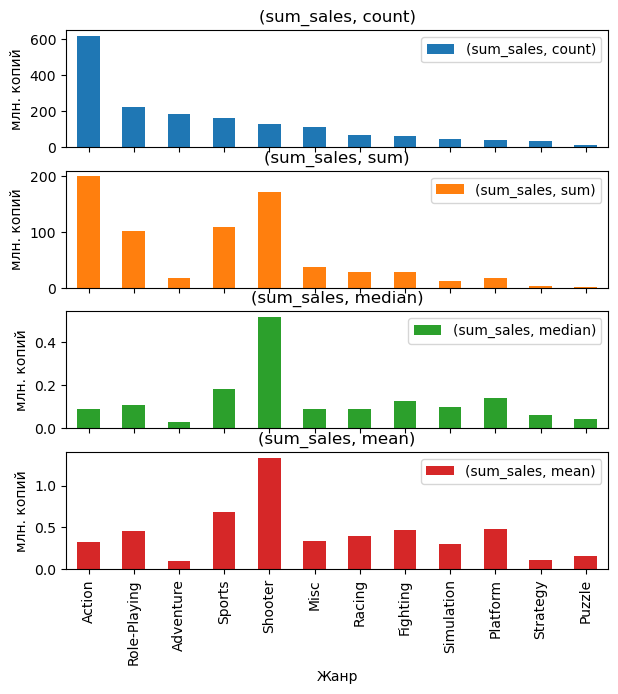

In [57]:
genre_games.plot(kind = 'bar', figsize = (7,7), subplots = True, xlabel='Жанр', ylabel='млн. копий')
plt.show()

**Вывод:**
    
   * Самые прибыльные жанры:
   1. Shooter. Игр в этом жанре выпускается не так много. Однако такие игры - лидер по среднему и медианному значению числа проданных копий одной игры. При чем это лидерство с большим отрывом. Несмотря на небольшое количество таких игр (128 в нашей выборке) продано огромное количество копий ( 170.94 млн. в нашей выборке). Значит такие игры пользуются популярностью у пользователей.
   2. Sports. Игры в этом жанре на втором месте по среднему и медианному значению числа проданных копий одной игры. Игр в этом жанре выходит немного больше чем шутеров, но, несмотря на это суммарные продажи более чем в 1,5 раза меньше чем у шутеров. Однако в нашей выборке это мое второе место.
   3. Platform. особенность этого жанра в том, что таких игр выходит совсем немного. Однако, учитывая средние и медианные значения, можно быть уверенным, в стабильном выхлопе.
   4. RPG. Второй по популярности жанр у разработчиков. Таких игр выпускается много. При этом среднее и, особенно, медианное значение достаточно высокое. Это может говорить как о качестве таких игр, как и в целом о любви геймеров к таким играм. 
   5. Fighting. Топ - 5 замыкают игры именно этого жанра. Показатели в целом похожи с жанром Platform. Небольшое отличие в том, что таких игр выходит немного больше, однако они имеют несколько худшие средние и медианные значения. Однако - это популярный жанр для поклонников приставок, особенно для тех, кто предпочитает играть в игры на двоих. Тоесть можно быть уверенным, что спрос на такие игры так или иначе будет.
   
   * Жанры с высокими и низкими продажами
   1. Здесь я бы хотел сказать несколько слов о жанре Action. Это лидер по количеству выпущенных игр, причем с гигантским отрывом. К примеру таких игр пыпущено почти в 5 раз больше, чем шутеров. Однако суммарные продажи почти не отличаются. Медианные и средние значения достаточно "средние" в нашей выборке. Здесь скорее велика вероятность провала компании, чем успеха.
   2. Несколько слов о жанре Adventure. Этот жанр в топ-3 по разработке, но явный аутсайдер по среднему и медианному значению. Соответственно и общих продаж совсем немного. Этот жанр точно не стоит рассматривать в наших целях.

## 4. Портрет пользователя каждого региона.

Для пользователя каждого региона (NA, EU, JP):

### 4.1 Самые популярные платформы (топ-5).

Посчитаем число проданных копий игр для каждой платформы в разбивке по регионам.

In [58]:
region_plat = new_data.pivot_table(index = ['platform'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
region_plat

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


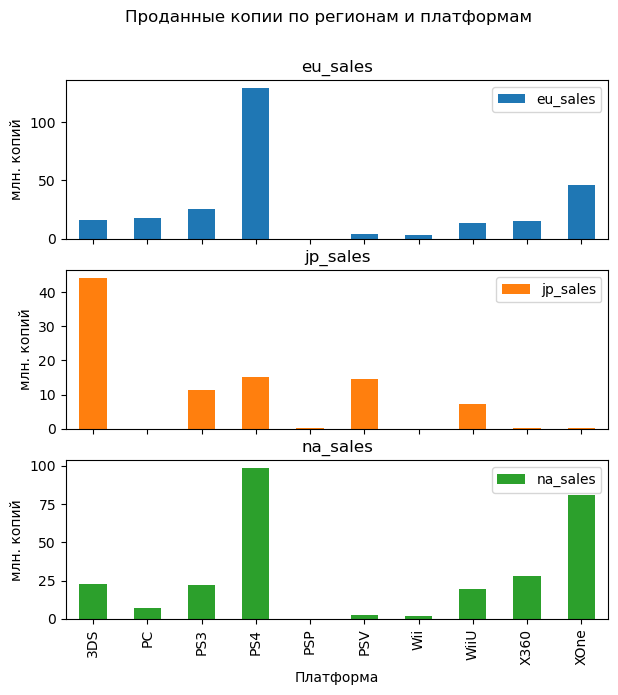

In [59]:
region_plat.plot(
kind = 'bar', figsize = (7,7), subplots = True,\
title='Проданные копии по регионам и платформам', xlabel='Платформа', ylabel='млн. копий'
)
plt.show()

Наблюдение: Популярные платформы в Японии сильно отличаются от платорм в Европе и Северной америке.
Топ 5 для Европы: 
1. PS4
2. XOne
3. PS3
4. PC
5. 3DS

Топ 5 для Японии:
1. 3DS
2. PS4
3. PSV
4. PS3
5. WiiU

Топ 5 для Северной Америки:
1. PS4
2. XOne
3. X360
4. 3DS
5. PS3

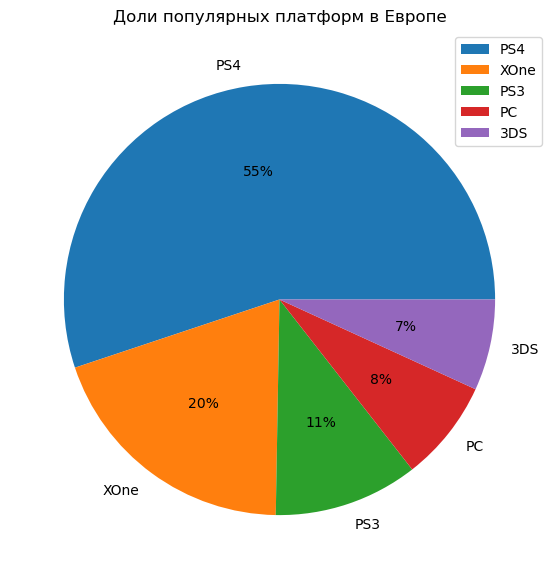

In [60]:
region_plat.sort_values(by = 'eu_sales', ascending = False).head(5)['eu_sales'].\
plot(kind = 'pie', figsize = (7,7), autopct='%1.0f%%', legend=True, title='Доли популярных платформ в Европе', label='')
plt.show()

На Европейском рынке 55 % проданных игр для PS4. 1/5 рынка занимает XOne. PS3, PC и 3DS вместе взятые занимают четверть рынка примерно в равных долях.

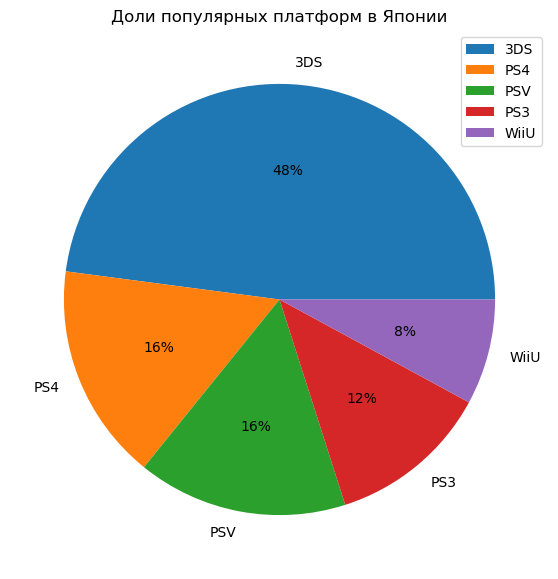

In [61]:
region_plat.sort_values(by = 'jp_sales', ascending = False).head(5)['jp_sales'].\
plot(kind = 'pie', figsize = (7,7), autopct='%1.0f%%', legend=True, title='Доли популярных платформ в Японии', label='')
plt.show()

В Японии почти половина геймеров предпочитает 3DS. Одинаково популярны PS4 и PSV - по 16%. PS3 и WiiU вместе занимают пятую часть рынка - 12% и 8% соответственно 

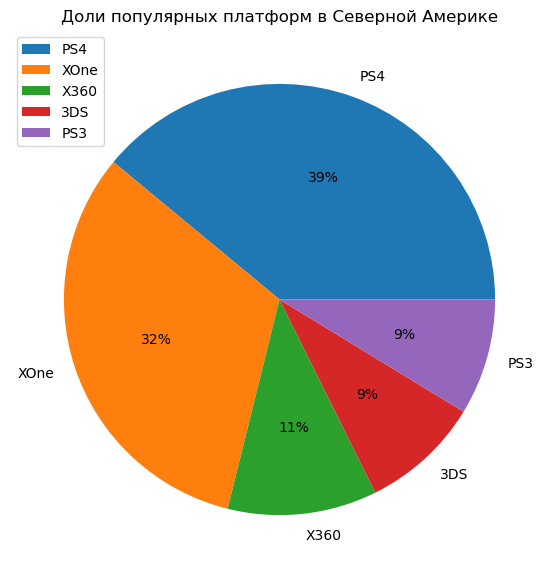

In [62]:
region_plat.sort_values(by = 'na_sales', ascending = False).head(5)['na_sales'].\
plot(kind = 'pie', figsize = (7,7), autopct='%1.0f%%', legend=True, title='Доли популярных платформ в Северной Америке',\
label='')
plt.show()

В Северней Америке читуация в целом похожа на Европу. Однако здесь XOne c 32% сильнее конкурирует с PS4 (39%). Еще одно отличие - В Северной Амекрике персональному компьютеру предпочитаю приставку X360.

### 4.2 Самые популярные жанры (топ-5).

In [63]:
region_genre = new_data.pivot_table(index = ['genre'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
region_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


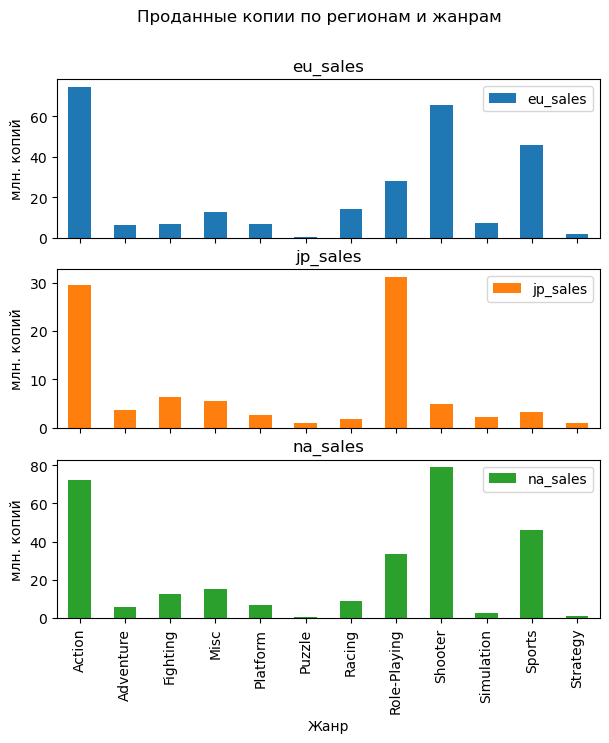

In [64]:
region_genre.plot(
kind = 'bar', figsize = (7,7), subplots = True,\
title='Проданные копии по регионам и жанрам', xlabel='Жанр', ylabel='млн. копий')
plt.show()

Здесь также отметим почти идентичность в предпочтениях у жителей Европы и Северной Америки. Как и в случае с платформами в Японии все немного иначе.

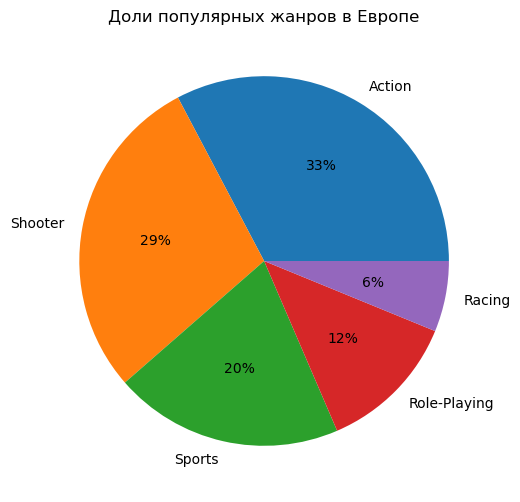

In [65]:
region_genre.sort_values(by = 'eu_sales', ascending = False).head(5)['eu_sales'].\
plot(kind = 'pie', figsize = (6,6), autopct='%1.0f%%', title='Доли популярных жанров в Европе', label='')
plt.show()

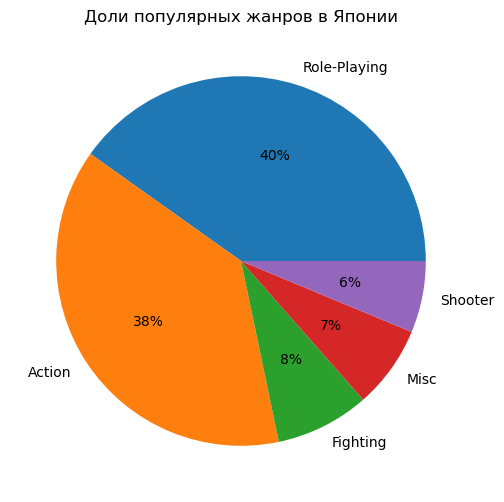

In [66]:
region_genre.sort_values(by = 'jp_sales', ascending = False).head(5)['jp_sales'].\
plot(kind = 'pie', figsize = (6,6), autopct='%1.0f%%', title='Доли популярных жанров в Японии', label='')
plt.show()

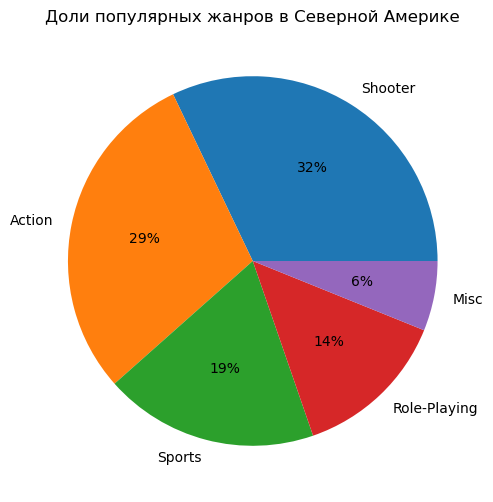

In [67]:
region_genre.sort_values(by = 'na_sales', ascending = False).head(5)['na_sales'].\
plot(kind = 'pie', figsize = (6,6), autopct='%1.0f%%', title='Доли популярных жанров в Северной Америке', label='')
plt.show()

Топ 5 жанров по регионам:

Европа:
1. Action 
2. Shooter
3. Sports 
4. RPG 
5. Racing

Япония:
1. RPG
2. Action
3. Fighting
4. Misc
5. Shooter

Северная Америка
1. Shooter
2. Action
3. Sports
4. RPG
5. Misc

Жанровые предпочтения жителей Европы и Северной Америки практический совпадают. Отличие в том, что европейцы немного больше предпочитают жанр Action нежели Shooter. В Северной Америке наоборот, с сохранением такой пропорции. Стоит отметить, что в Европе неплохо продаются игры жанра Racing, а в Северной Америке жанр Misc. Это 6 % рынка соответствующих регионов.
В Японии стоит отметить большую любовь жителей к жанру RPG - 40 % всех проданных копий игр именно этого жанра. Также в Японии как и в других регионах пользуются успехом игры жанра Action - 38 %. А вот Shooter в отличии от других регионов занимает только 5 место с 6 %. Также, в части Японии стоит отметить присутствие в топ-5 жанра Fighting.

### 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе.

Чтобы учитывать игры с пропусками в рейтинге, заполним пропуски значением 'no rating'

In [68]:
new_data['rating'] = new_data['rating'].fillna('no rating').copy()

C:\Users\79998\AppData\Local\Temp\ipykernel_24052\1458437786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['rating'] = new_data['rating'].fillna('no rating').copy()


Посчитаем суммарные продажи игр в разбивке по рейтингу и региону.

In [69]:
region_ESRB = new_data.pivot_table(index = ['rating'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
region_ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
no rating,58.95,56.90,64.72


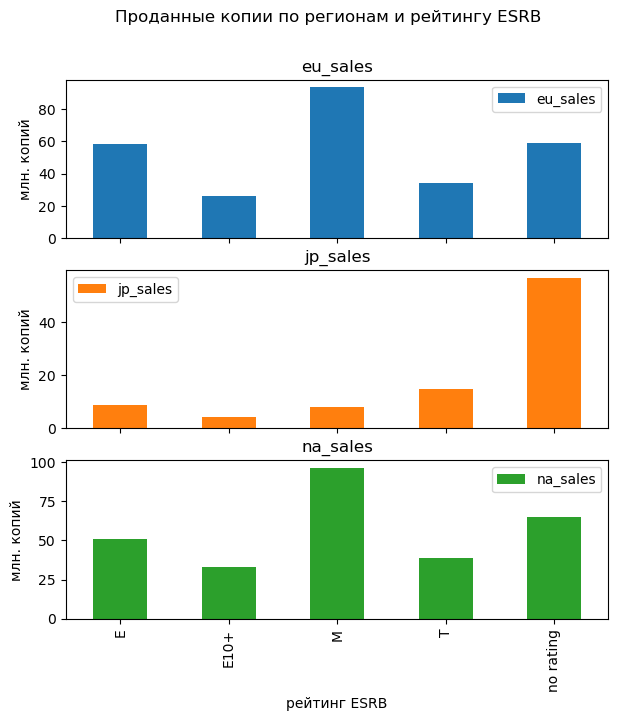

In [70]:
region_ESRB.plot(
kind = 'bar', figsize = (7,7), subplots = True,\
title='Проданные копии по регионам и рейтингу ESRB', xlabel='рейтинг ESRB', ylabel='млн. копий'
)
plt.show()

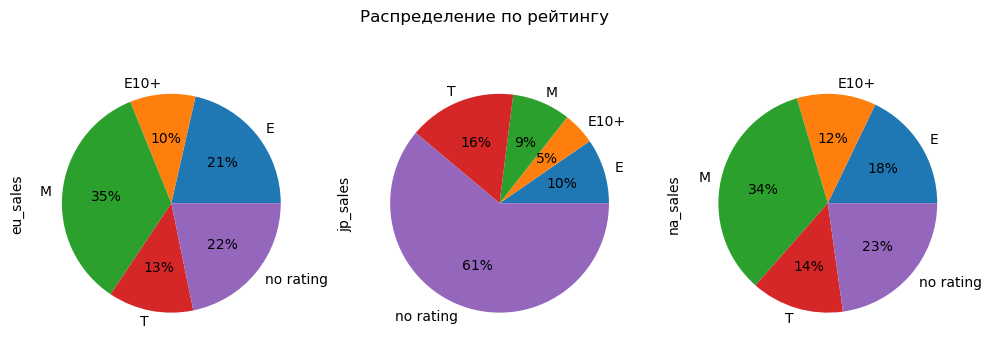

In [71]:
region_ESRB.plot(kind = 'pie', figsize = (12,4), subplots=True, autopct='%1.0f%%', title='Распределение по рейтингу',\
legend = False)
plt.show()

Сложно сказать влияет ли рейтинг ESRB на продажи в отдельном регионе. Не думаю, что это тот фактор, который является важным для пользователей при принятии решения о покупке игры. Скорее люди выбирают игры исходя из жанровых предпочтений и имеющейся у них платформы. Однако возможно ситуация с варификацией и подтверждением возраста при покупке игры в Японии несколько отличается от ситуации в Европе и Северной Америке. Также стоит отметить, что в Японии 61% покупаемых игр не имеют рейтинга. Остальное рейтинговое распределение достаточно равномерно, при этом лидер (16 %) - игры, имеющие рейтинг «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. В то время как в Европе и Северной Америке 35 и 34 % соответственно составляют игры с рейтингом «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Игры без рейтинга на 2 месте - 22 и 23 % соответственно. На 3 месте игры с рейтингом "E".

#### Портрет пользователя каждого региона:

* Европа
    - Платформа: PS4 и XOne
    - Жанры: Action, Shooter, Sports
    - Рейтинг: M, без рейтинга, E

* Северная Америка
    - Платформа: PS4 и XOne
    - Жанры: Shooter, Action, Sports
    - Рейтинг: M, без рейтинга, E

* Япония
    - Платформа: 3DS, PS4
    - Жанры: RPG, Action, Fighting
    - Рейтинг: без рейтинга, T.

## 5. Проверка гипотез.

Итак, сформулируем гипотезы, которые следует проверить:
* #### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


- H_0: Пользовательские рейтинги (user_score) платформ "XOne" = Пользовательские рейтинги (user_score) платформ "PC"
- H_a: Пользовательские рейтинги (user_score) платформ "XOne" ≠ Пользовательские рейтинги (user_score) платформ "PC"
- alpha = 0.05


* #### Средние пользовательские рейтинги жанров Action и Sports разные.


- H_0: Пользовательские рейтинги (user_score) жанров "Action" = Пользовательские рейтинги (user_score) жанров "Sports"
- H_a: Пользовательские рейтинги (user_score) жанров "Action" ≠ Пользовательские рейтинги (user_score) жанров "Sports"
- alpha = 0.05

Так как в обоих случаях нам требуется проверить равенство средних значений в двух выборках, учитывая нормальность исходных значений, будет использован критерий Стьюдента.

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Исключим игры без пользовательских оценок.

In [72]:
final_data = new_data.query('user_score >= 0')
final_data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62


Формулируем гипотезу следующим образом:
    
- H_0: Пользовательские рейтинги (user_score) платформ "XOne" = Пользовательские рейтинги (user_score) платформ "PC"
- H_a: Пользовательские рейтинги (user_score) платформ "XOne" ≠ Пользовательские рейтинги (user_score) платформ "PC"
- alpha = 0.05

In [73]:
xbox_user_score = final_data.query('platform in ("XOne")')['user_score']

pc_user_score = final_data.query('platform in ("PC")')['user_score']

alpha = 0.05

results = st.ttest_ind(xbox_user_score, pc_user_score) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348478
Не получилось отвергнуть нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий.

### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Формулируем гипотезу следующим образом:

- H_0: Пользовательские рейтинги (user_score) жанров "Action" = Пользовательские рейтинги (user_score) жанров "Sports"
- H_a: Пользовательские рейтинги (user_score) жанров "Action" ≠ Пользовательские рейтинги (user_score) жанров "Sports"
- alpha = 0.05

In [74]:
action_user_score = final_data.query('genre in ("Action")')['user_score']

sports_user_score = final_data.query('genre in ("Sports")')['user_score']

alpha = 0.05

results = st.ttest_ind(action_user_score, sports_user_score) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.871114798510669e-19
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action и Sports разные.

## 6. Выводы.

Для планирования компании по продажам игр на 2017 год нужно учитывать следующее:

1. Последние 5 лет в мире ежегодно выпускается порядка 500-600 игр.


2. Характерный срок "жизни" платформы - 10-12 лет. Пик продаж приходится на 3-5 год запуска платформы.


3. В качестве актуального периода для анализа был выбран 3-летний период (2014, 2015 и 2016 года).


4. Лидируют по продажам платформы
* PS4
* XOne
* 3DS

5. Потенциально прибыльные платформы на 2017 год:
* PS4
* XOne
* 3DS
* PC

6. Продаваемость игры практически не зависит от оценок пользователей. Здесь нет корреляции и линейной зависимости.


7. На продаваемость игры влияют оценки критиков. Корреляция достаточно ощутимая. Это применимо как к одной популярной платформе, так и к остальным вместе взятым


8. Самые прибыльные жанры:
* Shooter 
* Sports 
* Platform 
* RPG
* Fighting

9. Популярные платформы в Японии сильно отличаются от платорм в Европе и Северной америке.

* На Европейском рынке 55 % проданных игр для PS4. 1/5 рынка занимает XOne. PS3, PC и 3DS вместе взятые занимают четверть рынка примерно в равных долях.

* В Северней Америке читуация в целом похожа на Европу. Однако здесь XOne c 32% сильнее конкурирует с PS4 (39%). Еще одно отличие - В Северной Амекрике персональному компьютеру предпочитаю приставку X360.

* В Японии почти половина геймеров предпочитает 3DS. Одинаково популярны PS4 и PSV - по 16%. PS3 и WiiU вместе занимают пятую часть рынка - 12% и 8% соответственно

10. Топ 5 жанров по регионам:

Европа:
- 1. Action 
- 2. Shooter
- 3. Sports 
- 4. RPG 
- 5. Racing

Япония:
- 1. RPG
- 2. Action
- 3. Fighting
- 4. Misc
- 5. Shooter

Северная Америка
- 1. Shooter
- 2. Action
- 3. Sports
- 4. RPG
- 5. Misc


11. Сложно сказать влияет ли рейтинг ESRB на продажи в отдельном регионе. Не думаю, что это тот фактор, который является важным для пользователей при принятии решения о покупке игры. Скорее люди выбирают игры исходя из жанровых предпочтений и имеющейся у них платформы. Однако возможно ситуация с варификацией и подтверждением возраста при покупке игры в Японии несколько отличается от ситуации в Европе и Северной Америке. Также стоит отметить, что в Японии 61% покупаемых игр не имеют рейтинга. Остальное рейтинговое распределение достаточно равномерно, при этом лидер (16 %) - игры, имеющие рейтинг «T» («Teen») — «Подросткам». В то время как в Европе и Северной Америке 35 и 34 % соответственно составляют игры с рейтингом «M» («Mature») — «Для взрослых». Игры без рейтинга в Европе и Северной Америке на 2 месте - 22 и 23 % соответственно. На 3 месте игры с рейтингом "E" («Everyone») — «Для всех».


12. Можно говорить о том, что средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий.


13. Можно говорить о том, что средние пользовательские рейтинги жанров Action и Sports различаются.


#### Учитывая всё вышеизложенное, в 2017 году компанию по продажам следует развернуть, основываясь на портрете пользователя каждого из 3 регионов. Указанные игры соответствующего жанра и рейтинга на соответствующей платформе должны принести компании прибыль:


* Европа
    - Платформа: PS4 и XOne
    - Жанры: Action, Shooter, Sports
    - Рейтинг: M, без рейтинга, E

* Северная Америка
    - Платформа: PS4 и XOne
    - Жанры: Shooter, Action, Sports
    - Рейтинг: M, без рейтинга, E

* Япония
    - Платформа: 3DS, PS4
    - Жанры: RPG, Action, Fighting
    - Рейтинг: без рейтинга, T.